# WeatherPy
----

### Analysis
* The weather is significantly warmer near the equator. In winter the Southern hemisphere is warmer than the North. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and humidity in November.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, 80, 90, and 100% cloudiness in November.
* There is no strong relationship between latitude and wind speed. Some cities very far from the equator have very strong wind speeds much unlike others.

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import seaborn as sns
# https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date
# for converting unicode timestamps to something that makes human sense
from datetime import datetime
import random

# Import API key
import api_keys
api_key = "18cd48b447eff343d2dbc70c02a7bba0"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Build query URL and request your results in Celsius
query_urls = [f"{url}&APPID={api_key}&q={city}&units={units}" for city in cities]
# Get weather data
weather_response = [requests.get(url) for url in query_urls]
pprint(weather_response)


[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [404]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [

In [8]:
weather_json = [a.json() for a in weather_response]
pprint(weather_json)

[{'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -54.81, 'lon': -68.31},
  'dt': 1542387600,
  'id': 3833367,
  'main': {'humidity': 67,
           'pressure': 992,
           'temp': 6.67,
           'temp_max': 8,
           'temp_min': 5},
  'name': 'Ushuaia',
  'sys': {'country': 'AR',
          'id': 4754,
          'message': 0.0035,
          'sunrise': 1542356076,
          'sunset': 1542414175,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'light intensity drizzle',
               'icon': '09d',
               'id': 300,
               'main': 'Drizzle'},
              {'description': 'light intensity shower rain',
               'icon': '09d',
               'id': 520,
               'main': 'Rain'}],
  'wind': {'deg': 230, 'gust': 21.1, 'speed': 17}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 34.88, 'lon': -76.9},
  'dt': 1542387480,
  'id': 4470244,
  'main': {'humidity': 52,
  

  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 310, 'speed': 2.6}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 59.7, 'lon': 30.79},
  'dt': 1542387600,
  'id': 546105,
  'main': {'humidity': 81,
           'pressure': 1037,
           'temp': 7,
           'temp_max': 7,
           'temp_min': 7},
  'name': 'Nikolskoye',
  'sys': {'country': 'RU',
          'id': 7267,
          'message': 0.0034,
          'sunrise': 1542347803,
          'sunset': 1542374758,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 4}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -9.8, 'lon': -139.03},
  'dt': 1542390788,
  'id

 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 43.65, 'lon': 111.97},
  'dt': 1542390791,
  'id': 2037485,
  'main': {'grnd_level': 918.81,
           'humidity': 71,
           'pressure': 918.81,
           'sea_level': 1043.28,
           'temp': -11.8,
           'temp_max': -11.8,
           'temp_min': -11.8},
  'name': 'Erenhot',
  'sys': {'country': 'CN',
          'message': 0.0033,
          'sunrise': 1542324465,
          'sunset': 1542359140},
  'weather': [{'description': 'clear sky',
               'icon': '02n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 239.505, 'speed': 4.56}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 64.73, 'lon': 177.51},
  'dt': 1542387600,
  'id': 2127202,
  'main': {'humidity': 85,
           'pressure': 1011,
           'temp': -12,
           'temp_max': -12,
           'temp_min': -12},
  'name': 'Anadyr',
  'sys': {'country': 'RU',
      

               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 290, 'speed': 8.7}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 22.08, 'lon': -159.32},
  'dt': 1542387360,
  'id': 5848280,
  'main': {'humidity': 79,
           'pressure': 1017,
           'temp': 23.8,
           'temp_max': 24.4,
           'temp_min': 23.3},
  'name': 'Kapaa',
  'sys': {'country': 'US',
          'id': 833,
          'message': 0.004,
          'sunrise': 1542387030,
          'sunset': 1542426826,
          'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 6.7}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 57.31, 'lon': 88.17},
  'dt': 1542390795,
  'id': 1489822,
  'main': {'grnd_level': 1029.7,
           'humidity': 69,
          

 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 63.84, 'lon': -22.43},
  'dt': 1542389400,
  'id': 3416888,
  'main': {'humidity': 87,
           'pressure': 994,
           'temp': 8.41,
           'temp_max': 9,
           'temp_min': 8},
  'name': 'Grindavik',
  'sys': {'country': 'IS',
          'id': 4832,
          'message': 0.0034,
          'sunrise': 1542362463,
          'sunset': 1542385641,
          'type': 1},
  'visibility': 4000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 120, 'gust': 27.3, 'speed': 18.5}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -29.95, 'lon': -71.34},
  'dt': 1542387600,
  'id': 3893629,
  'main': {'humidity': 68,
           'pressure': 1015,
    

          'type': 1},
  'visibility': 48279,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'speed': 2.1}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -34.72, 'lon': 135.86},
  'dt': 1542390670,
  'id': 2063036,
  'main': {'grnd_level': 1033.42,
           'humidity': 100,
           'pressure': 1033.42,
           'sea_level': 1037.12,
           'temp': 12.91,
           'temp_max': 12.91,
           'temp_min': 12.91},
  'name': 'Port Lincoln',
  'sys': {'country': 'AU',
          'message': 0.0034,
          'sunrise': 1542310937,
          'sunset': 1542361253},
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 135.005, 'speed': 4.31}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -20.73, 'lon': 139.

  'name': 'Touros',
  'sys': {'country': 'BR',
          'message': 0.0034,
          'sunrise': 1542354959,
          'sunset': 1542399452},
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 106.005, 'speed': 6.71}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -6.97, 'lon': -34.84},
  'dt': 1542387600,
  'id': 3404558,
  'main': {'humidity': 58,
           'pressure': 1013,
           'temp': 30,
           'temp_max': 30,
           'temp_min': 30},
  'name': 'Cabedelo',
  'sys': {'country': 'BR',
          'id': 4516,
          'message': 0.0033,
          'sunrise': 1542354662,
          'sunset': 1542399452,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 70, 'speed': 4.6}},
 {'base': 'st

           'humidity': 63,
           'pressure': 974.01,
           'sea_level': 1029.83,
           'temp': -18.07,
           'temp_max': -18.07,
           'temp_min': -18.07},
  'name': 'Egvekinot',
  'sys': {'country': 'RU',
          'message': 0.0035,
          'sunrise': 1542401751,
          'sunset': 1542421596},
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 332.505, 'speed': 1.46}},
 {'base': 'stations',
  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': 65.4, 'lon': 64.7},
  'dt': 1542390859,
  'id': 1498161,
  'main': {'grnd_level': 1024.67,
           'humidity': 85,
           'pressure': 1024.67,
           'sea_level': 1029.99,
           'temp': -4.32,
           'temp_max': -4.32,
           'temp_min': -4.32},
  'name': 'Muzhi',
  'sys': {'country': 'RU',
          'message': 0.0032,
          'sunrise': 1542342430,
          'sunset': 1542363844},
 

           'pressure': 995.49,
           'sea_level': 1024.72,
           'temp': 23.51,
           'temp_max': 23.51,
           'temp_min': 23.51},
  'name': 'Wichian Buri',
  'sys': {'country': 'TH',
          'message': 0.0102,
          'sunrise': 1542323917,
          'sunset': 1542364919},
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 224.005, 'speed': 1.21}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -19.06, 'lon': -169.92},
  'dt': 1542387600,
  'id': 4036284,
  'main': {'humidity': 94,
           'pressure': 1005,
           'temp': 25,
           'temp_max': 25,
           'temp_min': 25},
  'name': 'Alofi',
  'sys': {'country': 'NU',
          'id': 8341,
          'message': 0.0035,
          'sunrise': 1542386008,
          'sunset': 1542432961,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'br

           'temp_min': 34},
  'name': 'Kolda',
  'sys': {'country': 'SN',
          'id': 6160,
          'message': 0.0036,
          'sunrise': 1542351538,
          'sunset': 1542393012,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'speed': 1}},
 {'base': 'stations',
  'clouds': {'all': 88},
  'cod': 200,
  'coord': {'lat': 59.61, 'lon': 60.57},
  'dt': 1542390895,
  'id': 1492663,
  'main': {'grnd_level': 1021.99,
           'humidity': 82,
           'pressure': 1021.99,
           'sea_level': 1038.46,
           'temp': -2.25,
           'temp_max': -2.25,
           'temp_min': -2.25},
  'name': 'Serov',
  'sys': {'country': 'RU',
          'message': 0.0039,
          'sunrise': 1542340610,
          'sunset': 1542367655},
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
         

           'temp_max': 11.1,
           'temp_min': 10.3},
  'name': 'Virginia Beach',
  'sys': {'country': 'US',
          'id': 2869,
          'message': 0.0051,
          'sunrise': 1542368637,
          'sunset': 1542405201,
          'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 5.7}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 63.75, 'lon': -68.52},
  'dt': 1542387600,
  'id': 5983720,
  'main': {'humidity': 76,
           'pressure': 1014,
           'temp': -23,
           'temp_max': -23,
           'temp_min': -23},
  'name': 'Iqaluit',
  'sys': {'country': 'CA',
          'id': 3590,
          'message': 0.0032,
          'sunrise': 1542373500,
          'sunset': 1542396731,
          'type': 1},
  'visibility': 9656,
  'weather': [{'descri

  'id': 515873,
  'main': {'humidity': 45,
           'pressure': 1044,
           'temp': -3,
           'temp_max': -3,
           'temp_min': -3},
  'name': 'Oktyabrskiy',
  'sys': {'country': 'RU',
          'id': 7322,
          'message': 0.0075,
          'sunrise': 1542344752,
          'sunset': 1542374367,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'speed': 1}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -5.81, 'lon': -61.3},
  'dt': 1542390909,
  'id': 3663503,
  'main': {'grnd_level': 1011.38,
           'humidity': 87,
           'pressure': 1011.38,
           'sea_level': 1019.65,
           'temp': 29.21,
           'temp_max': 29.21,
           'temp_min': 29.21},
  'name': 'Manicore',
  'rain': {'3h': 6.06},
  'sys': {'country': 'BR',
          'message': 0.0032,
          'sunrise': 1542

  'main': {'grnd_level': 1033.42,
           'humidity': 100,
           'pressure': 1033.42,
           'sea_level': 1033.47,
           'temp': 24.11,
           'temp_max': 24.11,
           'temp_min': 24.11},
  'name': 'Celestun',
  'sys': {'country': 'MX',
          'message': 0.0115,
          'sunrise': 1542370368,
          'sunset': 1542410403},
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 31.5048, 'speed': 7.51}},
 {'base': 'stations',
  'clouds': {'all': 36},
  'cod': 200,
  'coord': {'lat': 6.88, 'lon': -6.45},
  'dt': 1542390916,
  'id': 2290486,
  'main': {'grnd_level': 995.17,
           'humidity': 64,
           'pressure': 995.17,
           'sea_level': 1022.73,
           'temp': 28.33,
           'temp_max': 28.33,
           'temp_min': 28.33},
  'name': 'Daloa',
  'rain': {'3h': 1.3575},
  'sys': {'country': 'CI',
          'message': 0.004,
         

               'main': 'Clear'}],
  'wind': {'deg': 80, 'speed': 5.7}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -34, 'lon': 24.73},
  'dt': 1542390923,
  'id': 986717,
  'main': {'grnd_level': 1022.97,
           'humidity': 85,
           'pressure': 1022.97,
           'sea_level': 1032.46,
           'temp': 17.68,
           'temp_max': 17.68,
           'temp_min': 17.68},
  'name': 'Kruisfontein',
  'sys': {'country': 'ZA',
          'message': 0.0028,
          'sunrise': 1542337689,
          'sunset': 1542387850},
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 262.005, 'speed': 5.01}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 20.89, 'lon': -156.47},
  'dt': 1542387360,
  'id': 5847411,
  'main': {'humidity': 87,
           'pressure': 1015,
           'temp': 22.27,
           'temp_max': 23.9,


          'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 40, 'speed': 1.5}},
 {'base': 'stations',
  'clouds': {'all': 88},
  'cod': 200,
  'coord': {'lat': 63.05, 'lon': 179.32},
  'dt': 1542390932,
  'id': 2126710,
  'main': {'grnd_level': 1011.14,
           'humidity': 100,
           'pressure': 1011.14,
           'sea_level': 1019.21,
           'temp': -4.47,
           'temp_max': -4.47,
           'temp_min': -4.47},
  'name': 'Beringovskiy',
  'sys': {'country': 'RU',
          'message': 0.0031,
          'sunrise': 1542313529,
          'sunset': 1542337723},
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 351.005, 'speed': 7.56}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 67.67, 'lon':

          'type': 1},
  'visibility': 19312,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 350, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 12},
  'cod': 200,
  'coord': {'lat': 20.52, 'lon': -13.05},
  'dt': 1542390943,
  'id': 2381334,
  'main': {'grnd_level': 995.82,
           'humidity': 24,
           'pressure': 995.82,
           'sea_level': 1025.65,
           'temp': 25.53,
           'temp_max': 25.53,
           'temp_min': 25.53},
  'name': 'Atar',
  'sys': {'country': 'MR',
          'message': 0.0031,
          'sunrise': 1542351764,
          'sunset': 1542391874},
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 310.505, 'speed': 1.16}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 52.61, 'lon': 1.73},
  'dt': 1542

          'sunset': 1542407616,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 2.6}},
 {'base': 'stations',
  'clouds': {'all': 48},
  'cod': 200,
  'coord': {'lat': -39.19, 'lon': 173.88},
  'dt': 1542390953,
  'id': 2185763,
  'main': {'grnd_level': 1021.75,
           'humidity': 97,
           'pressure': 1021.75,
           'sea_level': 1031.29,
           'temp': 13.61,
           'temp_max': 13.61,
           'temp_min': 13.61},
  'name': 'Okato',
  'sys': {'country': 'NZ',
          'message': 0.0039,
          'sunrise': 1542301206,
          'sunset': 1542352739},
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 280.005, 'speed': 2.21}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  '

In [64]:
df_list = []
for idx in range(len(weather_json)):
    try:
        df_list.append([str(weather_json[idx]['name']), float(weather_json[idx]['clouds']['all']),
                        str(weather_json[idx]['sys']['country']), datetime.utcfromtimestamp(int(weather_json[idx]['dt'])).strftime('%Y-%m-%d %H:%M:%S'),
                        int(weather_json[idx]['main']['humidity']), int(weather_json[idx]['coord']['lat']),
                        int(weather_json[idx]['coord']['lon']), int(weather_json[idx]['main']['temp_max']),
                        int(weather_json[idx]['wind']['speed'])
                       ])
    except KeyError:
        pass
    
df_list

[['Ushuaia', 40.0, 'AR', '2018-11-16 17:00:00', 67, -54, -68, 8, 17],
 ['Havelock', 1.0, 'US', '2018-11-16 16:58:00', 52, 34, -76, 12, 5],
 ['Tuktoyaktuk', 75.0, 'CA', '2018-11-16 17:29:00', 77, 69, -133, -19, 2],
 ['Jamestown', 0.0, 'AU', '2018-11-16 17:49:16', 77, -33, 138, 6, 1],
 ['Ostrovnoy', 76.0, 'RU', '2018-11-16 17:53:05', 96, 68, 39, 0, 6],
 ['Hermanus', 32.0, 'ZA', '2018-11-16 17:53:06', 66, -34, 19, 15, 2],
 ['Hithadhoo', 12.0, 'MV', '2018-11-16 17:53:06', 99, 0, 73, 28, 5],
 ['Punta Arenas', 75.0, 'CL', '2018-11-16 17:00:00', 39, -53, -70, 10, 12],
 ['Zhigansk', 0.0, 'RU', '2018-11-16 17:53:06', 76, 66, 123, -27, 1],
 ['Hilo', 1.0, 'US', '2018-11-16 16:56:00', 75, 19, -155, 20, 2],
 ['Narsaq', 75.0, 'GL', '2018-11-16 16:50:00', 35, 60, -46, 4, 1],
 ['Puerto Ayora', 75.0, 'EC', '2018-11-16 17:00:00', 73, 0, -90, 25, 8],
 ['Sur', 0.0, 'OM', '2018-11-16 17:53:07', 100, 22, 59, 23, 1],
 ['Burdur', 20.0, 'TR', '2018-11-16 17:20:00', 55, 37, 30, 4, 4],
 ['Albany', 90.0, 'US', '2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
col = ["city", "cloudiness", "country", "date", "humidity", "latitude", "longitude","max_temp", "wind_speed"]
weather_df = pd.DataFrame.from_records(df_list, columns = col)
weather_df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,max_temp,wind_speed
0,Ushuaia,40.0,AR,1542387600,67,-54,-68,8,17
1,Havelock,1.0,US,1542387480,52,34,-76,12,5
2,Tuktoyaktuk,75.0,CA,1542389340,77,69,-133,-19,2
3,Jamestown,0.0,AU,1542390556,77,-33,138,6,1
4,Ostrovnoy,76.0,RU,1542390785,96,68,39,0,6


In [46]:
# to json file
weather_df_json = weather_df.to_json(orient="table")
with open('weather_df_json.txt', 'w') as f:
    f.write(weather_df_json)

In [49]:
# show counts
weather_df.count()

city          527
cloudiness    527
country       527
date          527
humidity      527
latitude      527
longitude     527
max_temp      527
wind_speed    527
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Humidity Plot

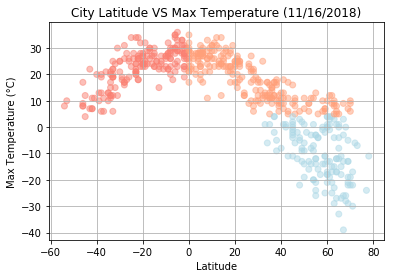

In [176]:
from matplotlib import colors as mcolors
# latitude vs temperature plot
plt.title("City Latitude VS Max Temperature (11/16/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(which='major', axis='both')
x = weather_df['latitude']
y = weather_df['max_temp']

# visualize colour palettes
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

# I want to make some gradients


colour_list_conditions = np.where(x<0, colors['salmon'], np.where(y<5,'#ADD8E6', colors['lightsalmon']))
plt.scatter(x,y, c=colour_list_conditions, alpha=0.5, marker="o", cmap='grey')

plt.savefig("Max_Temp.png")

#### Latitude vs. Humidity Plot

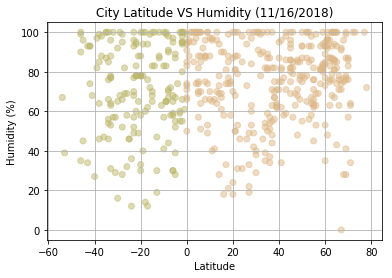

In [183]:
plt.title("City Latitude VS Humidity (11/16/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(which='major', axis='both')
x = weather_df['latitude']
y = weather_df['humidity']

colour_list_conditions = np.where(x<0, colors['darkkhaki'], np.where(y<0,'#ADD8E6', colors['burlywood']))
plt.scatter(x,y, c=colour_list_conditions, alpha=0.5, marker="o", cmap='grey')

plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

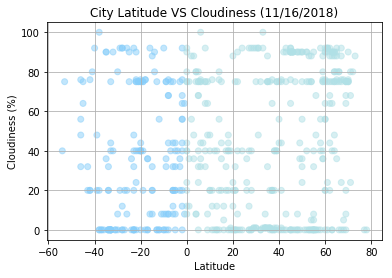

In [187]:
plt.title("City Latitude VS Cloudiness (11/16/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(which='major', axis='both')
x = weather_df['latitude']
y = weather_df['cloudiness']

colour_list_conditions = np.where(x<0, colors['lightskyblue'], np.where(y<0,'#ADD8E6', colors['powderblue']))
plt.scatter(x,y, c=colour_list_conditions, alpha=0.5, marker="o", cmap='grey')

plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

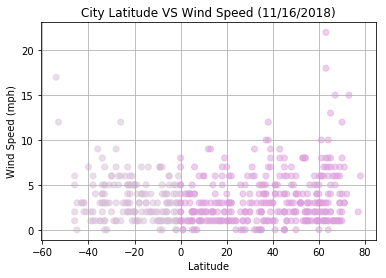

In [188]:
plt.title("City Latitude VS Wind Speed (11/16/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(which='major', axis='both')
x = weather_df['latitude']
y = weather_df['wind_speed']

colour_list_conditions = np.where(x<0, colors['thistle'], np.where(y<0,'#ADD8E6', colors['plum']))
plt.scatter(x,y, c=colour_list_conditions, alpha=0.5, marker="o", cmap='grey')

plt.savefig("Wind_Speed.png")